<a href="https://colab.research.google.com/github/AnishNoel24/Assignment-05-R-Programming/blob/main/Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Create a file that contains 1000 lines of random strings.

In [2]:
# Generate 1000 random strings
random_strings <- replicate(1000, paste(sample(c(letters, LETTERS, 0:9), 10, replace = TRUE), collapse = ""))

# Write the random strings to a file
writeLines(random_strings, "random_strings.txt")



Q2. Create a random dataset of 100 rows and 30 columns. All the values are defined between [1,200]. Perform
the following operations:
(i) Replace all the values with NA in the dataset defined between [10, 60]. Print the count of number
rows having missing values.
(ii) Replace all the NA values with the average of the column value.
(iii) Find the Pearson correlation among all the columns and plot heat map. Also select those columns
having correlation <=0.7.
(iv) Normalize all the values in the dataset between 0 and 10.
(v) Replace all the values in the dataset with 1 if value <=0.5 else with 0.

[1] "Number of rows with missing values: 51"


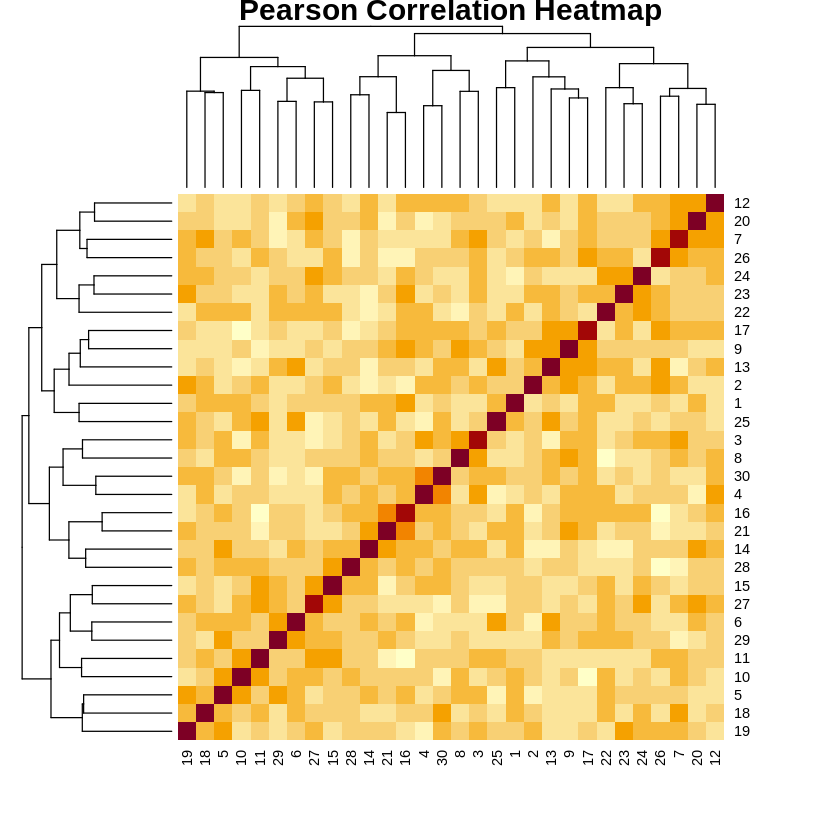

In [4]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(sample(1:200, 100*30, replace = TRUE), nrow = 100)

# (i) Replace values with NA between rows 10 and 60
dataset[10:60, ] <- NA

# Count number of rows with missing values
missing_rows <- sum(rowSums(is.na(dataset)) > 0)
print(paste("Number of rows with missing values:", missing_rows))

# (ii) Replace NA values with the column mean
dataset <- apply(dataset, 2, function(x) {
  ifelse(is.na(x), mean(x, na.rm = TRUE), x)
})

# (iii) Calculate Pearson correlation and plot heat map
correlation <- cor(dataset)
heatmap(correlation, main = "Pearson Correlation Heatmap")

# Select columns with correlation <= 0.7
correlation_threshold <- 0.7
selected_columns <- colnames(dataset)[sapply(correlation, function(x) any(abs(x) <= correlation_threshold))]

# (iv) Normalize values between 0 and 10
normalized_dataset <- apply(dataset, 2, function(x) {
  min_val <- min(x, na.rm = TRUE)
  max_val <- max(x, na.rm = TRUE)
  (x - min_val) / (max_val - min_val) * 10
})

# (v) Replace values with 1 if <= 0.5, else with 0
binary_dataset <- ifelse(normalized_dataset <= 0.5, 1, 0)


Q3. Create a random dataset of 500 rows and 10 columns.
Columns 1 to 4 are defined between [-10, 10];
Columns 5 to 8 are defined between [10, 20];
Columns 9 to 10 are defined between [-100, 100].
Apply following clustering algorithms; determine the optimal number of clusters and plot distance metric
graph using each algorithm.
(i) K-Mean clustering
(ii) Hierarchical clustering

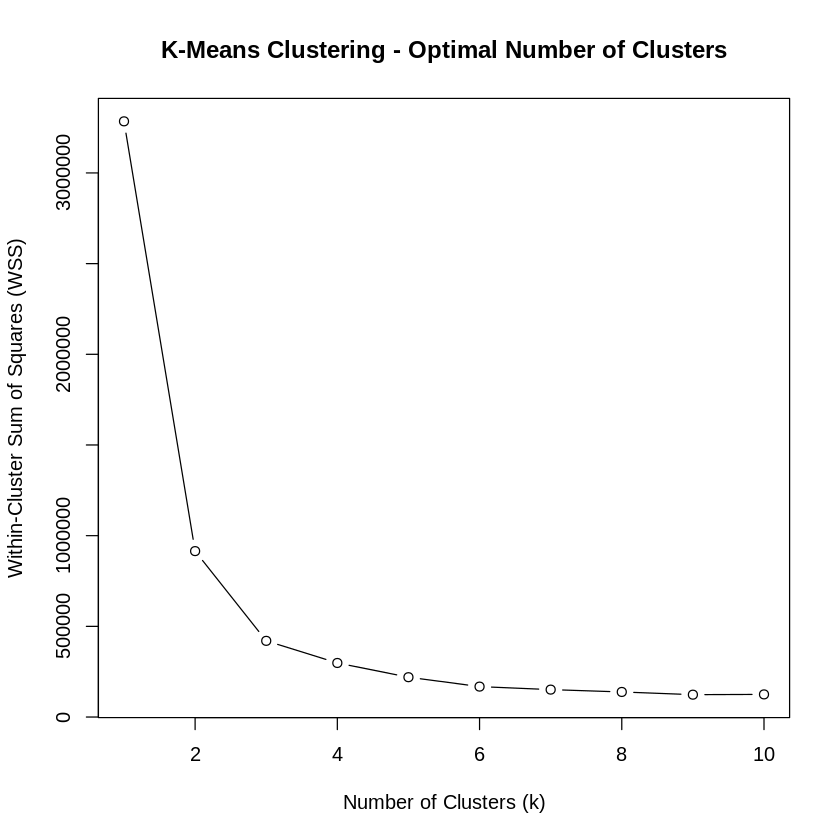

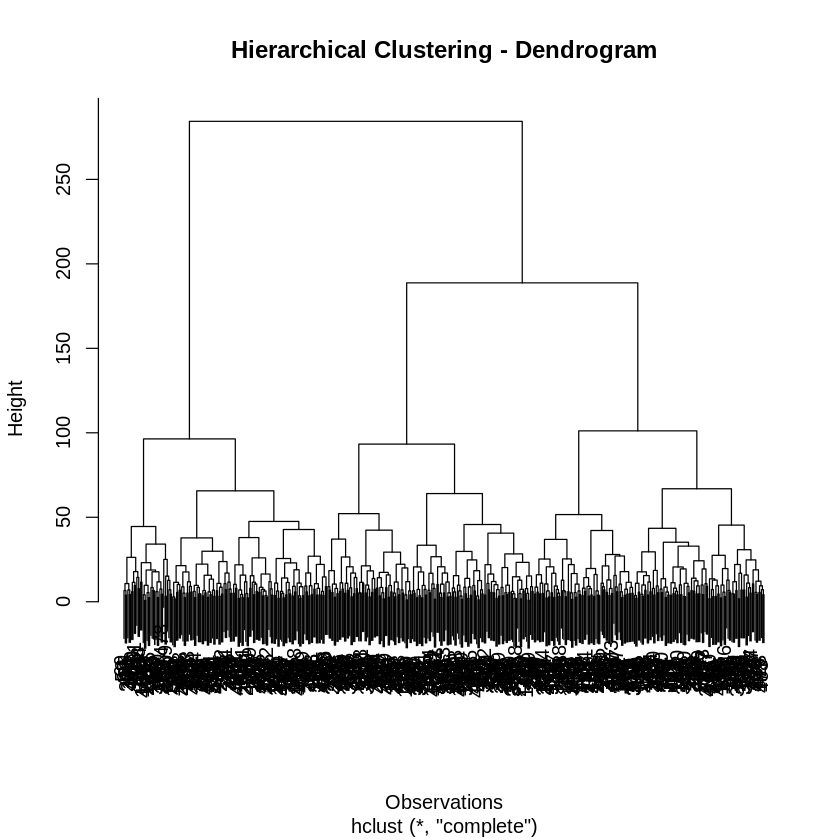

In [5]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(0, nrow = 500, ncol = 10)
dataset[, 1:4] <- runif(500, -10, 10)
dataset[, 5:8] <- runif(500, 10, 20)
dataset[, 9:10] <- runif(500, -100, 100)

# (i) K-Means Clustering

# Determine the optimal number of clusters using the "elbow" method
wss <- sapply(1:10, function(k) {
  kmeans(dataset, centers = k)$tot.withinss
})

# Plot the within-cluster sum of squares (WSS) to find the optimal number of clusters
plot(1:10, wss, type = "b", xlab = "Number of Clusters (k)", ylab = "Within-Cluster Sum of Squares (WSS)", main = "K-Means Clustering - Optimal Number of Clusters")

# (ii) Hierarchical Clustering

# Calculate the dissimilarity matrix using Euclidean distance
dist_matrix <- dist(dataset, method = "euclidean")

# Perform hierarchical clustering using complete linkage
hclust_result <- hclust(dist_matrix, method = "complete")

# Plot the dendrogram to visualize the clustering structure
plot(hclust_result, main = "Hierarchical Clustering - Dendrogram", xlab = "Observations")



Q4. Create a random dataset of 600 rows and 15 columns. All the values are defined between [-100,100].
Perform the following operations:
(i) Plot scatter graph between Column 5 and Column 6.
(ii) Plot histogram of each column in single graph.
(iii) Plot the Box plot of each column in single graph.

In [9]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



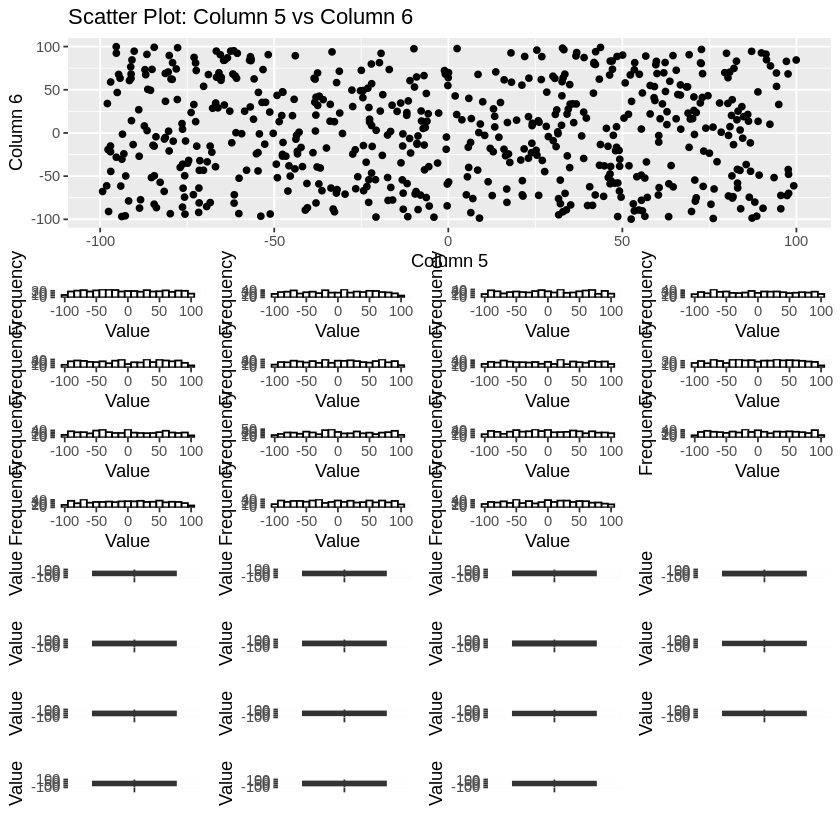

In [13]:
library(ggplot2)
library(cowplot)

# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(runif(600*15, -100, 100), nrow = 600)

# Convert to data frame
df <- as.data.frame(dataset)

# (i) Plot scatter graph between Column 5 and Column 6
scatter_plot <- ggplot(df, aes(x = V5, y = V6)) +
  geom_point() +
  xlab("Column 5") +
  ylab("Column 6") +
  ggtitle("Scatter Plot: Column 5 vs Column 6")

# (ii) Plot histogram of each column in a single graph
histogram_plot <- cowplot::plot_grid(plotlist = lapply(df, function(column) {
  ggplot(data.frame(value = column), aes(x = value)) +
    geom_histogram(binwidth = 10, color = "black", fill = "white") +
    xlab("Value") +
    ylab("Frequency")
}), ncol = 4)

# (iii) Plot box plot of each column in a single graph
boxplot_plot <- cowplot::plot_grid(plotlist = lapply(df, function(column) {
  ggplot(data.frame(value = column), aes(x = "", y = value)) +
    geom_boxplot() +
    xlab("") +
    ylab("Value")
}), ncol = 4)

# Combine the plots into a single graph
combined_plot <- cowplot::plot_grid(scatter_plot, histogram_plot, boxplot_plot, ncol = 1)

# Display the combined plot
print(combined_plot)


Q5. Create a random dataset of 500 rows and 5 columns:
All the values are defined between [5,10].
Perform the following operations:
(i) Perform t-Test on each column.
(ii) Perform Wilcoxon Signed Rank Test on each column.
(iii) Perform Two Sample t-Test and Wilcoxon Rank Sum Test on Column 3 and Column 4

In [15]:
# Set seed for reproducibility
set.seed(123)

# Generate random dataset
dataset <- matrix(runif(500*5, 5, 10), nrow = 500)

# Convert to data frame
df <- as.data.frame(dataset)

# (i) Perform t-Test on each column
t_test_results <- lapply(df, function(column) {
  t.test(column)
})

# (ii) Perform Wilcoxon Signed Rank Test on each column
wilcoxon_test_results <- lapply(df, function(column) {
  wilcox.test(column)
})

# (iii) Perform Two Sample t-Test between Column 3 and Column 4
column_3 <- df$V3
column_4 <- df$V4

two_sample_t_test <- t.test(column_3, column_4)

# Print the results
cat("T-Test Results:\n")
print(t_test_results)
cat("\n")

cat("Wilcoxon Signed Rank Test Results:\n")
print(wilcoxon_test_results)
cat("\n")

cat("Two Sample t-Test Results (Column 3 vs Column 4):\n")
print(two_sample_t_test)


T-Test Results:
$V1

	One Sample t-test

data:  column
t = 117.56, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.351464 7.601373
sample estimates:
mean of x 
 7.476418 


$V2

	One Sample t-test

data:  column
t = 115.29, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.368610 7.624109
sample estimates:
mean of x 
  7.49636 


$V3

	One Sample t-test

data:  column
t = 117.93, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.345020 7.593909
sample estimates:
mean of x 
 7.469464 


$V4

	One Sample t-test

data:  column
t = 116.53, df = 499, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 7.386422 7.639779
sample estimates:
mean of x 
 7.513101 


$V5

	One Sample t-test

data:  column
t = 112.82, df = 499, p-value < 2.2e-16
alternati